# Report for hydraulic systems Data Set   (Yinan Ni)

# Algorithms : 1. KNN  2. Random Forest  3. Logistic Regression

# Target Condition :  Cooler condition

In [ ]:
import sklearn as skl
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import zipfile
import csv
%matplotlib inline

# 1.Data Exploration

In [5]:
file_list = ['TS1', 'TS2', 'TS3', 'TS4','SE', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
              'PS6', 'FS1', 'FS2', 'EPS1', 'CP', 'CE']
file_list = ["{}.txt".format(s) for s in file_list]
all_file = []

for key in file_list:
    df = pd.read_table(key, header=None)
    all_file.append(df)


In [7]:
ts1 = all_file[0]
ts1.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


In [9]:
ts1.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,45.511420,45.460717,45.400622,45.336808,45.276612,45.218042,45.166757,45.121327,45.078724,45.045597,...,45.573747,45.557226,45.54675,45.540769,45.539410,45.537794,45.534888,45.533562,45.531347,45.527454
std,8.025131,8.025665,8.018736,8.008237,7.998160,7.986921,7.973767,7.962258,7.950144,7.938532,...,7.990195,7.983875,7.98408,7.989100,7.995141,8.000784,8.007442,8.014366,8.018769,8.022338
min,35.398000,35.320000,35.250000,35.168000,35.148000,35.094000,35.082000,34.988000,34.988000,34.988000,...,35.414000,35.414000,35.41000,35.414000,35.398000,35.398000,35.398000,35.395000,35.402000,35.395000
25%,36.312000,36.238000,36.187000,36.160000,36.090000,36.020000,36.008000,36.000000,35.934000,35.926000,...,36.395000,36.344000,36.33200,36.328000,36.328000,36.328000,36.328000,36.320000,36.320000,36.316000
50%,44.863000,44.855000,44.781000,44.711000,44.684000,44.621000,44.617000,44.527000,44.461000,44.457000,...,45.020000,45.016000,44.94100,44.941000,44.949000,44.937000,44.937000,44.937000,44.937000,44.930000
75%,54.238000,54.148000,54.070000,54.000000,53.906000,53.828000,53.816000,53.734000,53.660000,53.656000,...,54.246000,54.246000,54.24200,54.242000,54.242000,54.242000,54.242000,54.242000,54.242000,54.238000
max,58.039000,57.953000,57.941000,57.863000,57.715000,57.641000,57.609000,57.527000,57.465000,57.383000,...,58.023000,58.047000,58.03100,57.965000,57.945000,57.957000,57.957000,57.973000,57.973000,58.023000


In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()

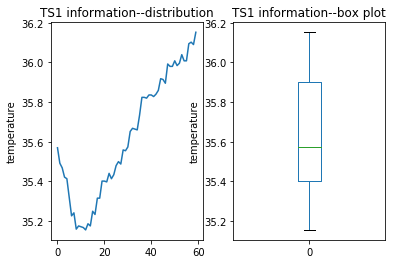

In [42]:
plt.subplot2grid((1,2),(0,0))           
ts1.loc[0].plot()
plt.title(u"TS1 information--distribution") 
plt.ylabel(u"temperature")  

plt.subplot2grid((1,2),(0,1))           
ts1.loc[0].plot(kind='box')
plt.title(u"TS1 information--box plot") 
plt.ylabel(u"temperature") 
plt.show()

From these pictrues, we can see that the data in txt file change over time. They are time series. I will show the distribution of all sensors in the following picture.

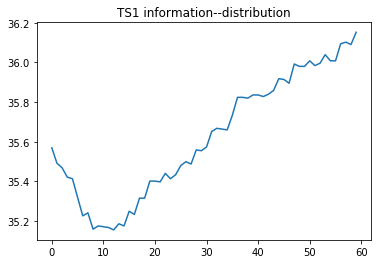

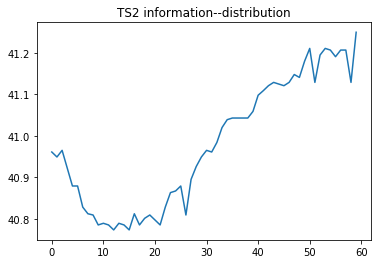

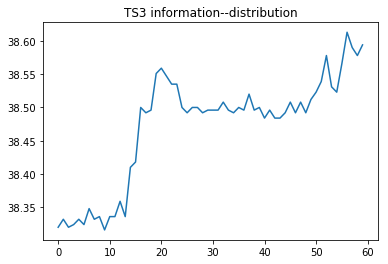

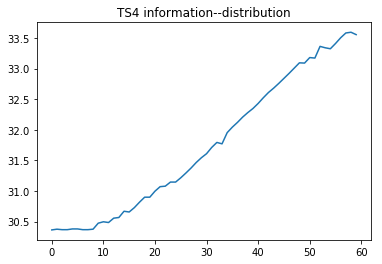

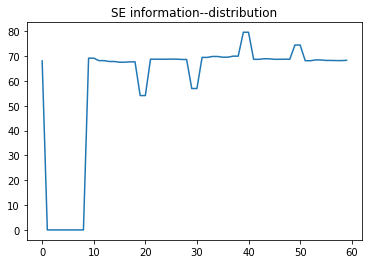

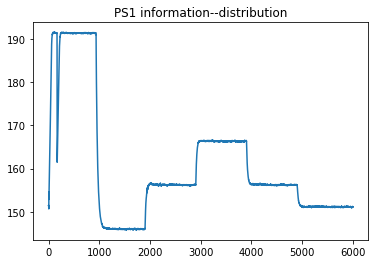

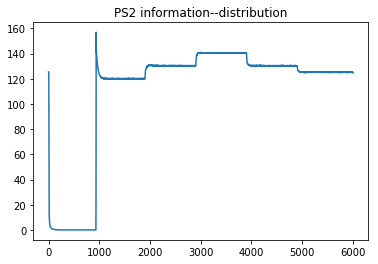

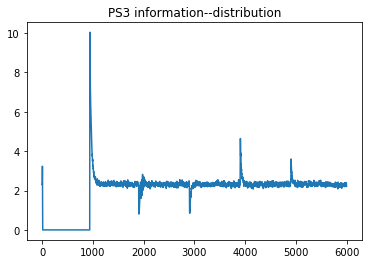

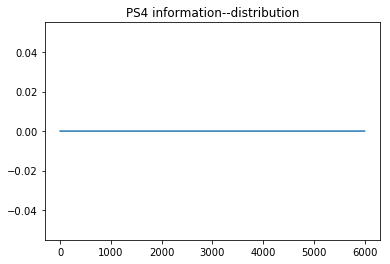

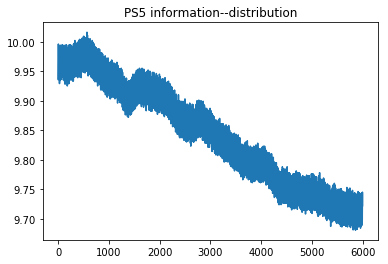

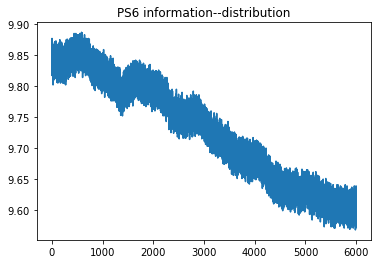

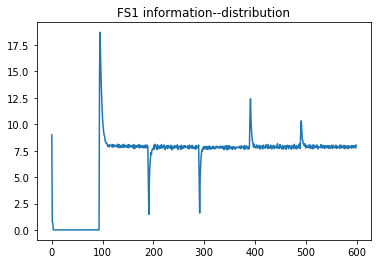

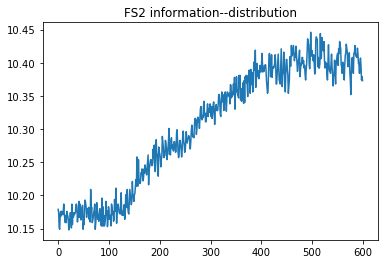

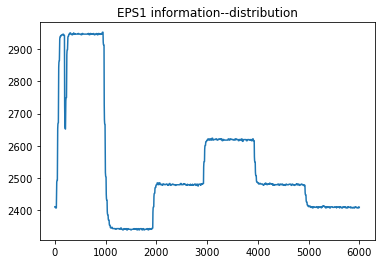

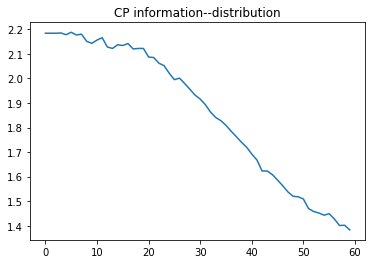

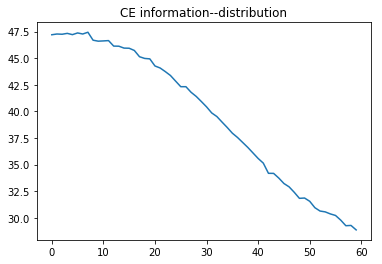

In [68]:
file_list = ['TS1', 'TS2', 'TS3', 'TS4','SE', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
              'PS6', 'FS1', 'FS2', 'EPS1', 'CP', 'CE']

for i in range(len(file_list)):
    all_file[i].loc[0].plot()
    title_name = "%s information--distribution" %(file_list[i])
    plt.title(title_name) 
    plt.show()
    

# 2. Data processing(data cleaning,validation, outlier value processing)

According to description file. There are no missing value. So I do not need to deal with missing data.
Also, since the data is time series, in my opinion, using mean value or median value of data(in one file) to present one featur is not reasonable. There are some ways to extract features for time series, and I will choose "piecewise aggregate approximation" method. Piecewise aggregate approximation is a method that representing the original time series by spliting the time series data equally and using the mean value to represent the segmented sequences.

From the information of description file. There are several features. Some features are 100Hz, which has 6000 columns in one txt file. Some features are 10Hz, which has 600 columns in one txt file. Some features are 1Hz, which has 60 columns in one txt file. If I use the 100Hz to predict the data, it will get the most precise outcome but it will have (6000*7+600*2+60*8) features. The data is so huge, and will take a long time the fit the data. So I plan to use 50HZ to prodict the data, which means I split the 100HZ data into 3000 parts, and calculate the mean value of each part. This method will process the extreme value too.

In [72]:
list_100 = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5',
            'PS6', 'EPS1']
list_10 = ['FS1', 'FS2']
list_1 = ['TS1','TS2','TS3','TS4','VS1','CE','CP','SE']

list_100 = [s + '.txt' for s in list_100]
list_10 = [s + '.txt' for s in list_10]
list_1 = [s + '.txt' for s in list_1]


for key in list_100:
    new_file = open(key.replace('.txt', '') + '_50Hz.csv', "w")
    writer = csv.writer(new_file, delimiter='\t')
    with zipfile.ZipFile('data.zip') as myzip:
        with myzip.open(key) as myfile:
            df = pd.read_table(myfile, header=None)
            for i in range(2205):
                row = df.loc[i, :].values.tolist()
                definite_row = []
                sum = 0
                for x, y in enumerate(row):
                    if x == 0:
                        sum += y
                    elif x == len(row)-1:
                        sum += y
                        definite_row.append(sum/2)
                    elif x % 2 != 0:
                        sum += y
                    else:
                        definite_row.append(sum/2)
                        sum = 0
                        sum += y

                writer.writerow(definite_row)
                del definite_row[:]

for key in list_10:
    new_file = open(key.replace('.txt', '') + '_50Hz.csv', "w")
    writer = csv.writer(new_file, delimiter='\t')
    with zipfile.ZipFile('data.zip') as myzip:
        with myzip.open(key) as myfile:
            df = pd.read_table(myfile, header=None)

            for i in range(2205):
                row = df.loc[i, :].values.tolist()
                definite_row = []
                for x, y in enumerate(row):
                    definite_row.append(y)

                writer.writerow(definite_row)
                del definite_row[:]

for key in list_1:
    new_file = open(key.replace('.txt', '') + '_50Hz.csv', "w")
    writer = csv.writer(new_file, delimiter='\t')
    with zipfile.ZipFile('data.zip') as myzip:
        with myzip.open(key) as myfile:
            df = pd.read_table(myfile, header=None)

            for i in range(2205):
                row = df.loc[i, :].values.tolist()
                definite_row = []
                for x, y in enumerate(row):
                    definite_row.append(y)

                writer.writerow(definite_row)
                del definite_row[:]

In [3]:
file_list = ['TS1', 'TS2', 'TS3', 'TS4','SE', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
              'PS6', 'FS1', 'FS2', 'EPS1', 'CP', 'CE']
file_list = ["{}_50Hz.csv".format(s) for s in file_list]
new_df = {}
all_df = pd.DataFrame()

for key in file_list:
    df = pd.read_table(key, header=None)
    all_df = pd.concat([all_df, df], axis=1)


Find some basic information about the data.

In [4]:
all_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,31.554,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,23.995,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,21.711,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,20.687,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,19.887,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016


In [4]:
all_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,45.511420,45.460717,45.400622,45.336808,45.276612,45.218042,45.166757,45.121327,45.078724,45.045597,...,31.087899,31.120328,31.142691,31.155982,31.152029,31.134627,31.125789,31.125212,31.145241,31.280535
std,8.025131,8.025665,8.018736,8.008237,7.998160,7.986921,7.973767,7.962258,7.950144,7.938532,...,11.514662,11.492642,11.478266,11.475240,11.483747,11.503765,11.525016,11.533142,11.533428,11.547106
min,35.398000,35.320000,35.250000,35.168000,35.148000,35.094000,35.082000,34.988000,34.988000,34.988000,...,17.293000,17.283000,17.188000,17.271000,17.314000,17.201000,17.283000,17.201000,17.324000,17.332000
25%,36.312000,36.238000,36.187000,36.160000,36.090000,36.020000,36.008000,36.000000,35.934000,35.926000,...,19.944000,20.016000,20.079000,20.143000,20.151000,20.127000,20.068000,20.014000,19.991000,20.115000
50%,44.863000,44.855000,44.781000,44.711000,44.684000,44.621000,44.617000,44.527000,44.461000,44.457000,...,27.061000,27.100000,27.115000,27.123000,27.116000,27.087000,27.067000,27.073000,27.105000,27.250000
75%,54.238000,54.148000,54.070000,54.000000,53.906000,53.828000,53.816000,53.734000,53.660000,53.656000,...,46.415000,46.396000,46.420000,46.424000,46.448000,46.452000,46.462000,46.467000,46.485000,46.625000
max,58.039000,57.953000,57.941000,57.863000,57.715000,57.641000,57.609000,57.527000,57.465000,57.383000,...,47.923000,48.042000,47.947000,47.876000,47.946000,48.030000,47.994000,48.005000,47.964000,48.266000


# 3. Model fitting and prediction

I will choose:
        1.k-Nearest Neighbors
        2.Random Forest
        3.Logistic regression
to make prediction.
I will choose Cooler condition as target condition.


In my opinion, it is a classfication question, so I will choose classification algorithms and supervised machine learning models.
According to Helwig, N., Pignanelli, E., & Schütze, A. (2015, May), they choose LDA algorithm to make prediction. 
However, the data which used in LDA should be normal distribution. I find it is very hard to prove every feature is normal distribution. So I do not choose this algorithm. I choose the algorithm which do not require normal distribution data.
The first algorithm I choose is KNN. 

# 3.1 KNN

In [20]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [13]:
target_df = pd.read_table('profile.txt', header=None)
target_df = target_df.drop([1,2,3,4], axis=1)

x_train, x_test, y_train, y_test = train_test_split(all_df, target_df, test_size=0.3, random_state=7)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train.values.ravel())
print(knn.score(x_test, y_test))

0.989425981873


In [28]:
pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, pred)
print('confusion matrix train\n',cm_train,'\n')
print('confusion matrix test\n', cm_test,'\n')

confusion matrix train
 [[495   0   2]
 [  5 519   0]
 [  1   2 519]] 

confusion matrix test
 [[235   0   0]
 [  3 205   0]
 [  1   0 218]] 



In [29]:
print('Classification report train\n',classification_report(y_train, y_train_pred),'\n')
print('Classification report test\n',classification_report(y_test, pred),'\n')

Classification report train
              precision    recall  f1-score   support

          3       0.99      1.00      0.99       497
         20       1.00      0.99      0.99       524
        100       1.00      0.99      1.00       522

avg / total       0.99      0.99      0.99      1543
 

Classification report test
              precision    recall  f1-score   support

          3       0.98      1.00      0.99       235
         20       1.00      0.99      0.99       208
        100       1.00      1.00      1.00       219

avg / total       0.99      0.99      0.99       662
 



In [31]:
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.993957703927


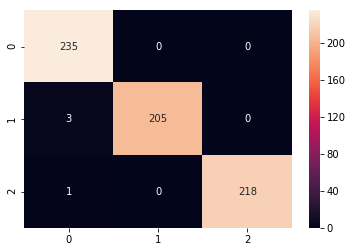

In [30]:
colorMetrics = confusion_matrix(y_test, pred)
sns.heatmap(colorMetrics,annot = True,fmt = 'd')
plt.show()

# 3.2 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV


/Users/lynn/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lynn/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [23]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(all_df, target_df, test_size=0.3, random_state=7)
rf0.fit(x_train, y_train.values.ravel())


/Users/lynn/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/lynn/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

In [32]:
pred1 = rf0.predict(x_test)
y_train_pred1 = rf0.predict(x_train)
cm_train1 = confusion_matrix(y_train, y_train_pred1)
cm_test1 = confusion_matrix(y_test, pred1)
print('confusion matrix train\n',cm_train1,'\n')
print('confusion matrix test\n', cm_test1,'\n')

confusion matrix train
 [[497   0   0]
 [  0 524   0]
 [  0   0 522]] 

confusion matrix test
 [[235   0   0]
 [  0 208   0]
 [  0   0 219]] 



In [33]:
print('Classification report train\n',classification_report(y_train, y_train_pred1),'\n')
print('Classification report test\n',classification_report(y_test, pred1),'\n')

Classification report train
              precision    recall  f1-score   support

          3       1.00      1.00      1.00       497
         20       1.00      1.00      1.00       524
        100       1.00      1.00      1.00       522

avg / total       1.00      1.00      1.00      1543
 

Classification report test
              precision    recall  f1-score   support

          3       1.00      1.00      1.00       235
         20       1.00      1.00      1.00       208
        100       1.00      1.00      1.00       219

avg / total       1.00      1.00      1.00       662
 



In [34]:
print("Accuracy:", accuracy_score(y_test, pred1))

Accuracy: 1.0


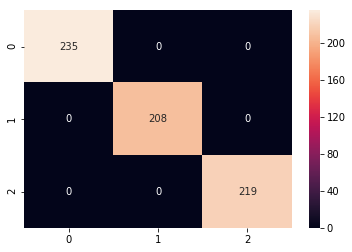

In [35]:
colorMetrics = confusion_matrix(y_test, pred1)
sns.heatmap(colorMetrics,annot = True,fmt = 'd')
plt.show()

# 3.3 SVM

Since this method do not have good predict performance as the other three , so this method will be dropped.

In [37]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
pred2 = svm.predict(x_test)
y_train_pred2 = svm.predict(x_train)
cm_train2 = confusion_matrix(y_train, y_train_pred2)
cm_test2 = confusion_matrix(y_test, pred2)
print('confusion matrix train\n',cm_train2,'\n')
print('confusion matrix test\n', cm_test2,'\n')

confusion matrix train
 [[497   0   0]
 [  0 524   0]
 [  0   0 522]] 

confusion matrix test
 [[233   2   0]
 [ 21 187   0]
 [ 24   0 195]] 



In [39]:
print('Classification report train\n',classification_report(y_train, y_train_pred2),'\n')
print('Classification report test\n',classification_report(y_test, pred2),'\n')

Classification report train
              precision    recall  f1-score   support

          3       1.00      1.00      1.00       497
         20       1.00      1.00      1.00       524
        100       1.00      1.00      1.00       522

avg / total       1.00      1.00      1.00      1543
 

Classification report test
              precision    recall  f1-score   support

          3       0.84      0.99      0.91       235
         20       0.99      0.90      0.94       208
        100       1.00      0.89      0.94       219

avg / total       0.94      0.93      0.93       662
 



In [41]:
print("Accuracy:", accuracy_score(y_test, pred2))

Accuracy: 0.929003021148


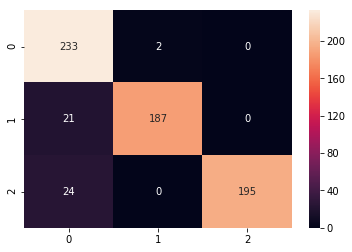

In [42]:
colorMetrics = confusion_matrix(y_test, pred2)
sns.heatmap(colorMetrics,annot = True,fmt = 'd')
plt.show()

# 3.4 Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(all_df, target_df, test_size=0.3, random_state=6)
logi = LogisticRegression(C=1e3,solver='lbfgs')
logi.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [44]:
pred3 = logi.predict(x_test)
y_train_pred3 = logi.predict(x_train)
cm_train3 = confusion_matrix(y_train, y_train_pred3)
cm_test3 = confusion_matrix(y_test, pred3)
print('confusion matrix train\n',cm_train3,'\n')
print('confusion matrix test\n', cm_test3,'\n')

confusion matrix train
 [[530   5   0]
 [  9 495   0]
 [  0   1 503]] 

confusion matrix test
 [[195   1   1]
 [  3 225   0]
 [  0   0 237]] 



In [45]:
print('Classification report train\n',classification_report(y_train, y_train_pred3),'\n')
print('Classification report test\n',classification_report(y_test, pred3),'\n')

Classification report train
              precision    recall  f1-score   support

          3       0.98      0.99      0.99       535
         20       0.99      0.98      0.99       504
        100       1.00      1.00      1.00       504

avg / total       0.99      0.99      0.99      1543
 

Classification report test
              precision    recall  f1-score   support

          3       0.98      0.99      0.99       197
         20       1.00      0.99      0.99       228
        100       1.00      1.00      1.00       237

avg / total       0.99      0.99      0.99       662
 



In [46]:
print("Accuracy:", accuracy_score(y_test, pred3))


Accuracy: 0.992447129909


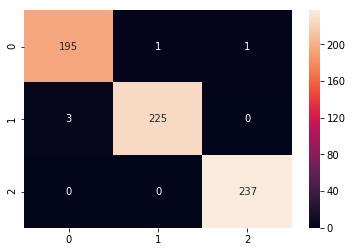

In [47]:
colorMetrics = confusion_matrix(y_test, pred3)
sns.heatmap(cm_test3,annot = True,fmt = 'd',clip_on=True)
plt.show()

# 4. Model Optimization

From base models, we can seen that KNN, Random Forest, Logistic Regression has high performance in the prediction.So I choose this three algorithms, and will make optimization on KNN and Logistic Regression.

# 4.1 Cross-Validation

Cross-Validation is a method to observe traning model. Doing cross-validation will tell whether the traning model has great prediction accuracy.

In [48]:
from sklearn.ensemble import BaggingRegressor
from sklearn.cross_validation import cross_val_score

In [56]:
print('Cross-Validation Score for Logictic Regression Model',cross_val_score(logi, x_train, y_train.values.ravel(), cv=5))


Cross-Validation Score for Logictic Regression Model [ 0.98705502  0.98705502  0.99352751  0.99029126  0.97068404]


In [57]:
print('Cross-Validation Score for KNN Model',cross_val_score(knn, x_train, y_train.values.ravel(), cv=5))

Cross-Validation Score for KNN Model [ 0.98705502  0.97734628  0.99029126  0.98381877  0.99348534]


# 4.2 Learning curves

The model may overfitting or underfitting, so I need to draw learning curves to judge if the model is overfitting/underfitting.

In [53]:
from sklearn.learning_curve import learning_curve

/Users/lynn/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


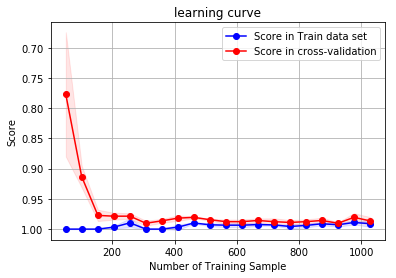

(0.9881336904652267, 0.016151235431609012)

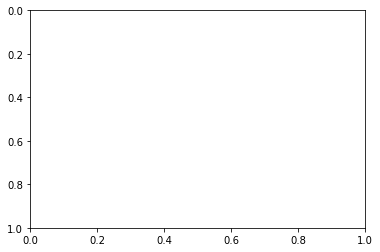

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"Number of Training Sample")
        plt.ylabel(u"Score")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"Score in Train data set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"Score in cross-validation")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(logi, u"learning curve",  x_train, y_train.values.ravel())

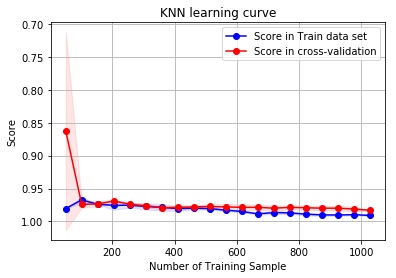

(0.98717580439221109, 0.0099166515182846915)

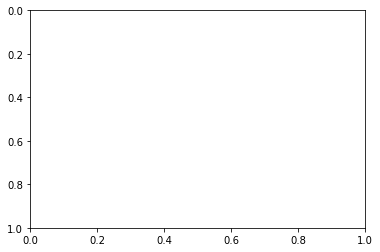

In [55]:
plot_learning_curve(knn, u"KNN learning curve",  x_train, y_train.values.ravel())

From learning curves, we can see that the model is not overfitting or underfitting.

# 5 Result

From the result in 4.1, we can see the prediction accuracy for KNN is 0.993957703927

From the result in 4.2, we can see the prediction accuracy for Random Forest is 1

From the result in 4.2, we can see the prediction accuracy for Logistic is 0.992447129909

Random Forest has the best performance in model prediction.

# Reference

[1] Helwig, N., Pignanelli, E., & Schütze, A. (2015, May). Condition monitoring of a complex hydraulic system using multivariate statistics. In Instrumentation and Measurement Technology Conference (I2MTC), 2015 IEEE International (pp. 210-215). IEEE.